In [1]:
import numpy as np
#from numpy import linalg 
import matplotlib.pyplot as plt
import scipy as sp
from scipy.sparse import linalg
from scipy.special import hankel1

In [2]:
#integral
def I(a, b, xm, N):
    H = (b - a) / N
    X = np.zeros((N, 1))
    F = np.zeros((N, 1), dtype = np.complex)
    sum = 0
    for i in range(N):
        X[i] = (H / 2) + i * H + a      
        F[i] =  hankel1(0, np.abs(xm - X[i]))
        sum += F[i]
    return sum * H

#integral
def Dop(a, b, xm, N):
    H = (b - a) / N
    X = np.zeros((N, 1))
    F = np.zeros((N, 1), dtype = np.complex)
    sum = 0
    for i in range(N):
        X[i] = (H / 2) + i * H + a      
        F[i] =  hankel1(0, np.abs(xm - X[i])) - (- 2.j / np.pi) * np.log(1 / np.abs(xm - X[i])) 
        sum += F[i]
    return sum * H

#special integral I
def Int(u, v, i, N):
    h = u/N
    halfH = h/2
    z = np.zeros((N, 1))
    F = np.zeros((N, 1), dtype = np.complex)
    for j in range(N):
        z[j] = halfH + j * h
           
    #middle
    def Func(x): 
        return (- 2.j / np.pi) * (np.log(x) * np.power(x, i - 1)) / (np.sqrt(4 * np.pi * np.pi + 0.j - (x + v)*(x + v)))
    for j in range(N):
        res = Func(z[j])
        F[j] = res
    
    sum = 0
    for j in range(N):
        sum += F[j]
    
    interior = h * sum
    return interior 

#beta
def beta(xm, h, N):
    if xm >= 0 and xm <= h:
        return - Int(xm, -xm, 1, N) + (1 / h) * Int(xm, -xm, 2, N) - Int(h, xm, 1, N) + (1 / h) * Int(h, xm, 2, N)
    elif xm >= h and xm <= 2 * np.pi - h:
        return - Int(h, -xm, 1, N) + (1 / h) * Int(h, -xm, 2, N) - Int(h, xm, 1, N) + (1 / h) * Int(h, xm, 2, N)
    elif xm >= 2 * np.pi - h and xm <= 2 * np.pi:
        return - Int(h, -xm, 1, N) + (1/h) * Int(h, -xm, 2, N) - Int(2 * np.pi - xm, xm, 1, N) + (1 / h) * Int(2 * np.pi - xm, xm, 2, N)
    else:
        print("error")
        return 0

In [6]:
def Processing(N):
    h = 2 * np.pi / N

    XM = np.zeros((N, 1))
    for i in range(N):
        XM[i] = 0 + (h / 2) + i * h

    SN = np.zeros((N + 1, 1))
    for j in range(N + 1):
        SN[j] = 0 + j * h
    
    mat = np.zeros((N, N), dtype = np.complex)
    for m in range(N):
        for n in range(N):
            if n == m:
                mat[m, n] = beta(XM[m], h, N) * np.sqrt(4 * np.pi * np.pi - XM[m] * XM[m]) + Dop(SN[n], SN[n + 1], XM[m], N)  + 0 #LEGIT         
            else:
                mat[m, n] = I(SN[n], SN[n + 1], XM[m], N) 
                
                
    #print(mat) ################ 
    
    right1 = np.zeros((N, 1), dtype = np.complex)
    for i in range(N):
        right1[i] = 2 / ( np.pi * 1.j) #theta = 90, cos(theta) = 0 => exp = 1

    #answer1 = linalg.solve(mat, right1)
    answer1, inf1 = sp.sparse.linalg.bicgstab(mat, right1)
    print(inf1)

    right2 = np.zeros((N, 1), dtype = np.complex)
    for i in range(N):
        right2[i] = (2 * np.exp(1.j * XM[i] * np.sqrt(2) / 2)) / ( np.pi * 1.j) #theta = 45, cos(theta) = sqrt(2)/2
    
    #answer2 = linalg.solve(mat, right2)
    answer2, inf2 = sp.sparse.linalg.bicgstab(mat, right2)
    print(inf2)

    right3 = np.zeros((N, 1), dtype = np.complex)
    for i in range(N):
        right3[i] = (2 * np.exp(1.j * XM[i])) / ( np.pi * 1.j) #theta = 0, cos(theta) = 1
    
    #answer3 = linalg.solve(mat, right3)
    answer3, inf3 = sp.sparse.linalg.bicgstab(mat, right3)
    print(inf3)
    
    return XM, SN, answer1, answer2, answer3, N

In [7]:
res = Processing(100)

0
0
0


In [8]:
def Drawing(XM, answer1, answer2, answer3, N):
    plt.rcParams.update({'font.size': 18})
    plt.rcParams.update({'xtick.labelsize': 18})
    plt.rcParams.update({'ytick.labelsize': 18})
    plt.rcParams['figure.figsize'] = [8, 5] #12,6

    #real
    res_real1 = np.real(answer1)
    plt.plot(XM[2: N - 2], res_real1[2: N - 2], 'bo', label = "θ = 90")

    res_real2 = np.real(answer2)
    plt.plot(XM[2: N - 2], res_real2[2: N - 2], 'bo', color = 'green', label = "θ = 45")

    res_real3 = np.real(answer3)
    plt.plot(XM[2: N - 2], res_real3[2: N - 2], 'bo', color = '#4b0082', label = "θ = 0")

    plt.legend(bbox_to_anchor=(0.85, 0.90),
               bbox_transform=plt.gcf().transFigure)

    plt.xlabel("x")
    plt.ylabel("Re j(x)") #Re j(x)

    plt.grid()
    plt.show()

    #imag
    res_imag1 = np.imag(answer1)
    plt.plot(XM[2: N - 2], res_imag1[2: N - 2], 'bo', label = "θ = 90")

    res_imag2 = np.imag(answer2)
    plt.plot(XM[2: N - 2], res_imag2[2: N - 2], 'bo', color = 'green', label = "θ = 45")

    res_imag3 = np.imag(answer3)
    plt.plot(XM[2: N - 2], res_imag3[2: N - 2], 'bo', color = '#4b0082', label = "θ = 0")

    #plt.legend(bbox_to_anchor=(0.92, 0.90),
    #           bbox_transform=plt.gcf().transFigure)

    plt.xlabel("x")
    plt.ylabel("Im j(x)")

    plt.grid()
    plt.show()

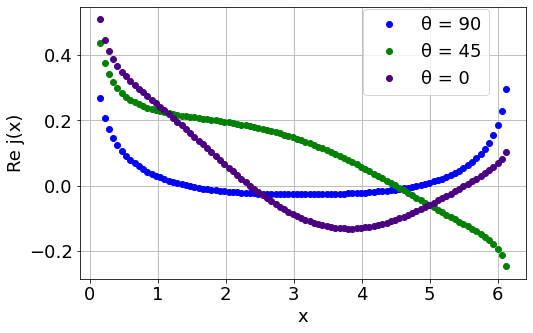

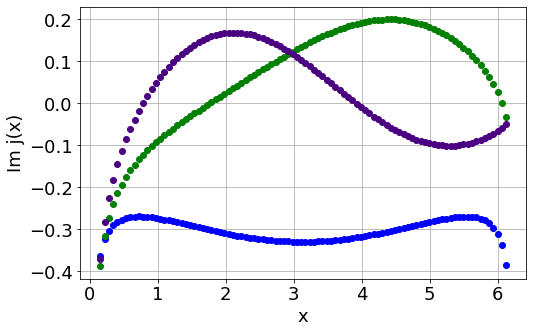

In [9]:
Drawing(res[0], res[2], res[3], res[4], res[5])

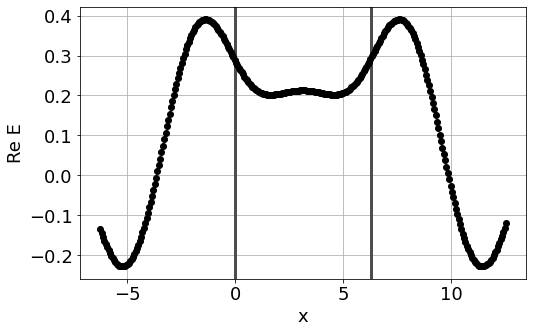

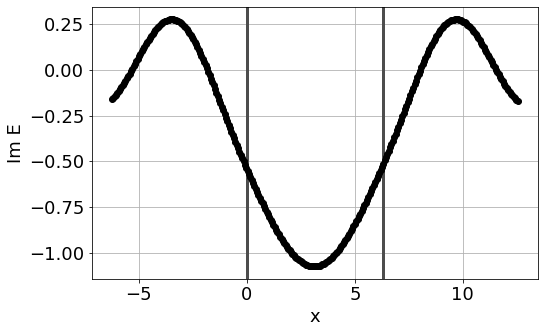

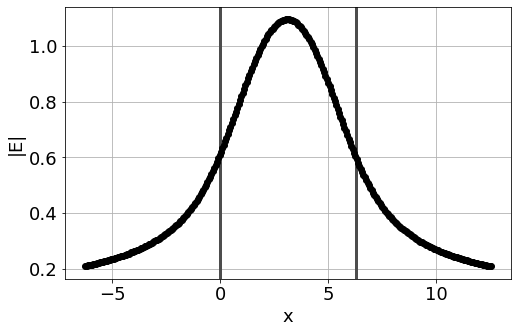

In [13]:
plt.rcParams['figure.figsize'] = [8, 5] #12,6
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'xtick.labelsize': 18})
plt.rcParams.update({'ytick.labelsize': 18})

_y = 0.3 * 2 * np.pi

_N = 300

_h = 6 * np.pi / _N

_X = np.zeros((_N, 1))
for i in range (_N):
    _X[i] = - 2 * np.pi + (_h / 2) + _h * i
    
_SUMM = np.zeros((_N, 1), dtype = np.complex)
for i in range (_N):
    _tempSUMM = 0 + 0.j
    for j in range (res[5]):
        _tempSUMM += (np.pi * 1.j / 2) * hankel1(0, np.sqrt((_X[i] - res[1][j])*(_X[i] - res[1][j]) + _y*_y)) * res[2][j]
    _SUMM[i] = _tempSUMM * _h

#|E_z^S|
#plt.plot(_X, np.real(-_SUMM), 'bo', color = 'darkblue')
#plt.axvline(x = 0, color = 'black', linewidth = 3)
#plt.axvline(x = 2 * np.pi, color = 'black', linewidth = 3)
plt.axvline(x = 0, color = '0.3', linewidth = 3)
plt.axvline(x = 2 * np.pi, color = '0.3', linewidth = 3)
plt.plot(_X, np.real(-_SUMM), 'bo', color = '0')
plt.xlabel("x")
plt.ylabel("Re E")
plt.grid()
plt.show()

#plt.plot(_X, np.imag(-_SUMM), 'bo', color = 'darkblue')
#plt.axvline(x = 0, color = 'black', linewidth = 3)
#plt.axvline(x = 2 * np.pi, color = 'black', linewidth = 3)
plt.axvline(x = 0, color = '0.3', linewidth = 3)
plt.axvline(x = 2 * np.pi, color = '0.3', linewidth = 3)
plt.plot(_X, np.imag(-_SUMM), 'bo', color = '0')
plt.xlabel("x")
plt.ylabel("Im E")
plt.grid()
plt.show()

#plt.plot(_X, np.abs(-_SUMM), 'bo', color = 'darkblue')
#plt.axvline(x = 0, color = 'black', linewidth = 3)
#plt.axvline(x = 2 * np.pi, color = 'black', linewidth = 3)
plt.axvline(x = 0, color = '0.3', linewidth = 3)
plt.axvline(x = 2 * np.pi, color = '0.3', linewidth = 3)
plt.plot(_X, np.abs(-_SUMM), 'bo', color = '0')
plt.xlabel("x")
plt.ylabel("|E|")
plt.grid()
plt.show()

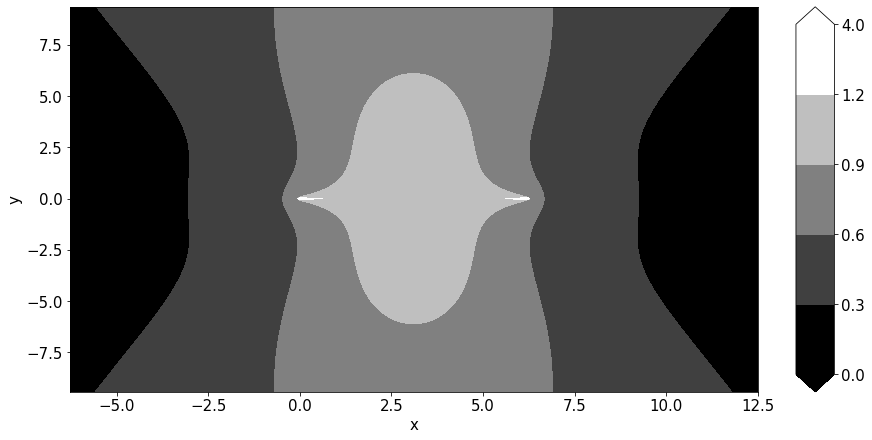

In [14]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'xtick.labelsize': 15})
plt.rcParams.update({'ytick.labelsize': 15})

newN = 300

def FU(x, y):
    tempSUMM = 0 + 0.j
    for j in range (res[5]):
        tempSUMM += (np.pi * 1.j / 2) * hankel1(0, np.sqrt((x - res[1][j])*(x - res[1][j]) + y*y)) * res[2][j]
    tempSUMM = tempSUMM * (6 * np.pi / newN)
    return np.abs(- tempSUMM)

delta = (6 * np.pi / newN)
xrange = np.arange(-2*np.pi, 4*np.pi, delta)
yrange = np.arange(-3*np.pi, 3*np.pi, delta)
X, Y = np.meshgrid(xrange, yrange)
F = FU(X, Y) 

bar, sub = plt.subplots(constrained_layout=True)
#PIC = sub.contourf(X, Y, F,  levels=[0, 0.5, 1.0, 1.5, 2.0, 2.5], 
#                   colors=['midnightblue', 'royalblue', 'darkcyan', 'lawngreen', 'yellow'], extend='both') 
#PIC = sub.contourf(X, Y, F, cmap = 'RdGy')
#PIC = sub.contourf(X, Y, F, cmap = plt.cm.plasma)
#PIC = sub.contourf(X, Y, F, cmap = plt.cm.viridis)
#PIC = sub.contourf(X, Y, F,  levels=[0, 0.3, 0.6, 0.9, 1.2, 1.5, 4], 
                   #cmap = plt.cm.RdGy)  #inferno
    
#PIC = sub.contourf(X, Y, F,  levels=[0, 0.3, 0.6, 0.9, 1.2, 1.5, 4], 
#                   colors=['0', '0.2', '0.4', '0.6', '0.8', '1'], extend='both') 
PIC = sub.contourf(X, Y, F,  levels=[0, 0.3, 0.6, 0.9, 1.2, 4], 
                   colors=['0', '0.25', '0.5', '0.75', '1'], extend='both') 
cbar = bar.colorbar(PIC)


plt.xlabel("x")
plt.ylabel("y")

#plt.rcParams.update({'font.size': 10})
#plt.grid()
plt.show()

In [61]:
def residual(sn, results, N):
    
    x1 = 0.5 + 0.5 * (2*np.pi/N)
    x2 = 0.3 + 0.5 * (2*np.pi/N)
    x3 = 0.1 + 0.5 * (2*np.pi/N)
    print(x1)
    print(x2)
    print(x3)
    
    numSln1 = 0 + 0.j
    for i in range(N):
        numSln1 += results[i] * hankel1(0, np.abs(sn[i] - x1))
    numSln1 *= (2*np.pi/N)
    print(numSln1)
    
    right_part_1 = 2 / ( np.pi * 1.j)
    print(right_part_1)
    
    #print("Residual in 0.5 = ", numSln1 - ((2 * np.exp(1.j * x1 * np.sqrt(2) / 2)) / ( np.pi * 1.j)))
    print("Residual in 0.5 = ", numSln1 - right_part_1)
    
    numSln2 = 0
    for i in range(N):
        numSln2 += results[i] * hankel1(0, np.abs(sn[i] - x2))
    numSln2 *= (2*np.pi/N)
    #print(numSln2)
    
    print("Residual in 0.3 = ", numSln2 - right_part_1)
    
    numSln3 = 0
    for i in range(N):
        numSln3 += results[i] * hankel1(0, np.abs(sn[i] - x3))
    numSln3 *= (2*np.pi/N)
    #print(numSln3)
    
    print("Residual in 0.1 = ", numSln3 - right_part_1)

In [62]:
residual(res[1], res[2], res[5])

0.531415926535898
0.3314159265358979
0.13141592653589795
[0.00525789-0.63496466j]
-0.6366197723675814j
Residual in 0.5 =  [0.00525789+0.00165511j]
Residual in 0.3 =  [0.00245526+0.00108667j]
Residual in 0.1 =  [-0.01144827-0.00857035j]
